### Gaining a Clearer Understanding of General Trends (Without Outliers):

#### Table of contents
* Data cleaning
* Identify and remove outliers
* Exploratory data analysis

### Objective: To focus on the general trend and relationships between variables without the distortion that outliers can cause

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
from scipy import stats
from wordcloud import WordCloud

In [5]:
df_video = pd.read_csv('D:\Project_DA\Youtube Api\TrendingVideo_YTdata.csv', index_col = 0)

### Data cleaning / Wrangling

In [6]:
#changed the data type of publishedAt column to data and time 
df_video['publishedAt'] = pd.to_datetime(df_video['publishedAt'])

In [7]:
#parse the duration into a proper time format
def parse_videoDuration(duration_str):
    duration = isodate.parse_duration(duration_str)
    return duration.total_seconds()


In [8]:
df_video['duration_in_seconds'] = df_video['duration'].apply(parse_videoDuration)

In [9]:
df_video['duration_in_minutes'] = df_video['duration_in_seconds']/ 60

In [10]:
import ast

# Convert string representation of lists into actual lists
df_video['tags'] = df_video['tags'].apply(ast.literal_eval)

In [11]:
#Compute the length of each element in the Series/Index.
df_video['number_of_tags']=df_video.tags.str.len()

In [12]:
#created a binary column for caption availability
df_video['has_caption']= df_video['caption'].apply(lambda x: 1 if x else 0)

### Identify and Remove Outliers

In [13]:
data_to_plot = df_video[['viewCount', 'likeCount','commentCount','duration_in_minutes']]


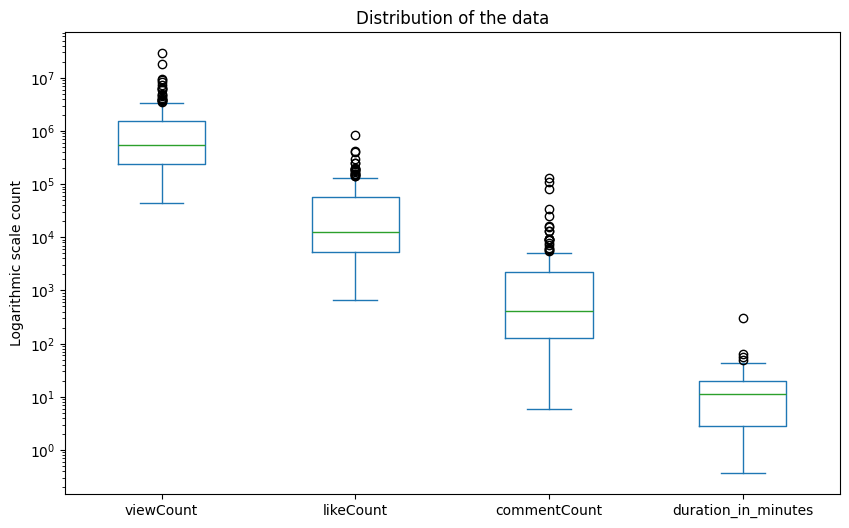

In [14]:
data_to_plot.plot(kind= 'box', logy= True, figsize= (10,6))

plt.ylabel("Logarithmic scale count")
plt.title("Distribution of the data")
plt.show()


In [15]:
#Calculate the IQR and remove data points that lie below Q1 - 1.5IQR or above Q3 + 1.5IQR.
Q1 = df_video[['viewCount', 'likeCount', 'commentCount', 'duration_in_minutes']].quantile(0.25)
Q3 = df_video[['viewCount', 'likeCount', 'commentCount', 'duration_in_minutes']].quantile(0.75)
IQR = Q3 - Q1

In [16]:
df_filtered = df_video[~((df_video[['viewCount', 'likeCount', 'commentCount', 'duration_in_minutes']] < (Q1 - 1.5 * IQR)) |(df_video[['viewCount', 'likeCount', 'commentCount', 'duration_in_minutes']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
df_filtered_plot = df_filtered[['viewCount', 'likeCount','commentCount','duration_in_minutes']]

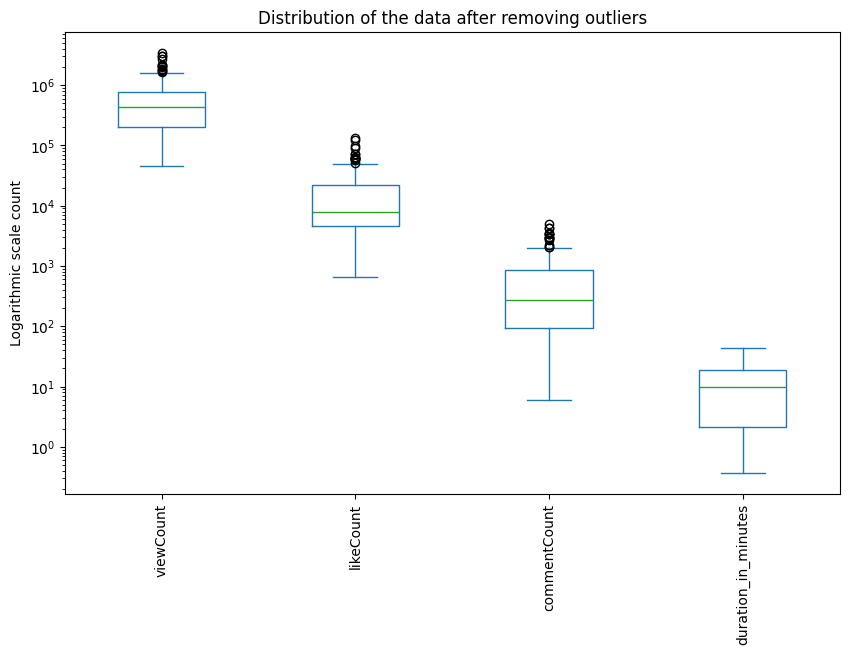

In [18]:
df_filtered_plot.plot(kind= 'box', logy= True, figsize= (10,6))

plt.ylabel("Logarithmic scale count")
plt.xticks(rotation = 90)
plt.title("Distribution of the data after removing outliers")
plt.show()


In [19]:
#further applying log transformation after removing the outliers since the distribution is highly skewed
df_filtered['log_viewCount'] = np.log1p(df_filtered['viewCount'])
df_filtered['log_likeCount'] = np.log1p(df_filtered['likeCount'])
df_filtered['log_commentCount'] = np.log1p(df_filtered['commentCount'])

C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_4888\477721467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_viewCount'] = np.log1p(df_filtered['viewCount'])
C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_4888\477721467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_likeCount'] = np.log1p(df_filtered['likeCount'])
C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_4888\477721467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [20]:
df_filtered_plot_2 = df_filtered[['log_viewCount', 'log_likeCount','log_commentCount','duration_in_minutes']]

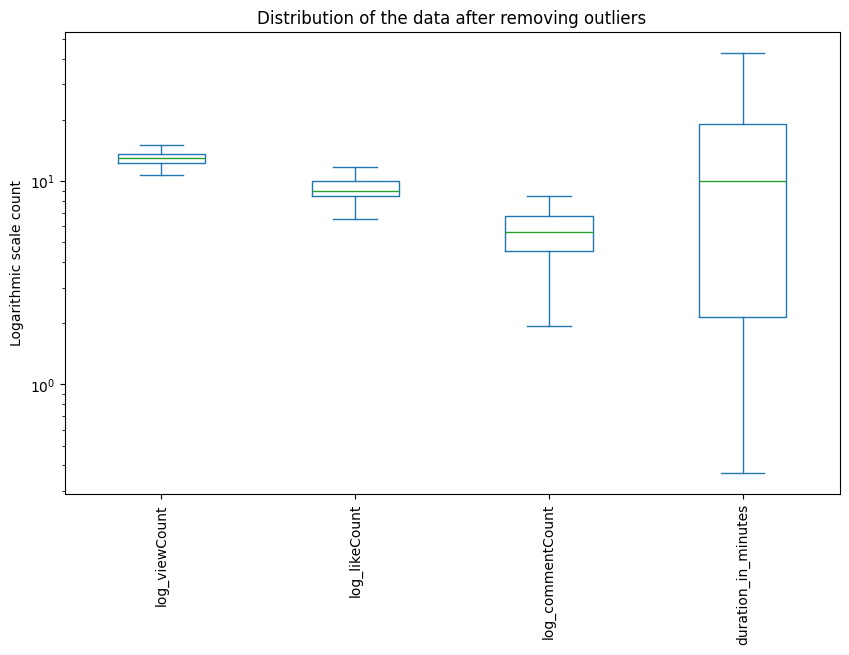

In [21]:
df_filtered_plot_2.plot(kind= 'box', logy= True, figsize= (10,6))

plt.ylabel("Logarithmic scale count")
plt.xticks(rotation = 90)
plt.title("Distribution of the data after removing outliers")
plt.show()

In [22]:
#correlation for IQR
corr_res_1 = df_filtered[['viewCount','likeCount', 'commentCount', 'duration_in_minutes', 'number_of_tags']].corr()
corr_res_1

,viewCount,likeCount,commentCount,duration_in_minutes,number_of_tags
viewCount,1.000000,0.783344,0.663181,-0.103338,0.096328
likeCount,0.783344,1.000000,0.804433,-0.053041,-0.054057
commentCount,0.663181,0.804433,1.000000,-0.011625,-0.122144
duration_in_minutes,-0.103338,-0.053041,-0.011625,1.000000,-0.115747
number_of_tags,0.096328,-0.054057,-0.122144,-0.115747,1.000000


In [37]:
#correlation for IQR +log transformation 
corr_res_2 = df_filtered[['log_viewCount','log_likeCount', 'log_commentCount', 'duration_in_minutes', 'number_of_tags']].corr()
corr_res_2

,log_viewCount,log_likeCount,log_commentCount,duration_in_minutes,number_of_tags
log_viewCount,1.000000,0.748790,0.454281,-0.127848,0.164823
log_likeCount,0.748790,1.000000,0.776837,-0.135009,-0.035957
log_commentCount,0.454281,0.776837,1.000000,0.086860,-0.214538
duration_in_minutes,-0.127848,-0.135009,0.086860,1.000000,-0.115747
number_of_tags,0.164823,-0.035957,-0.214538,-0.115747,1.000000


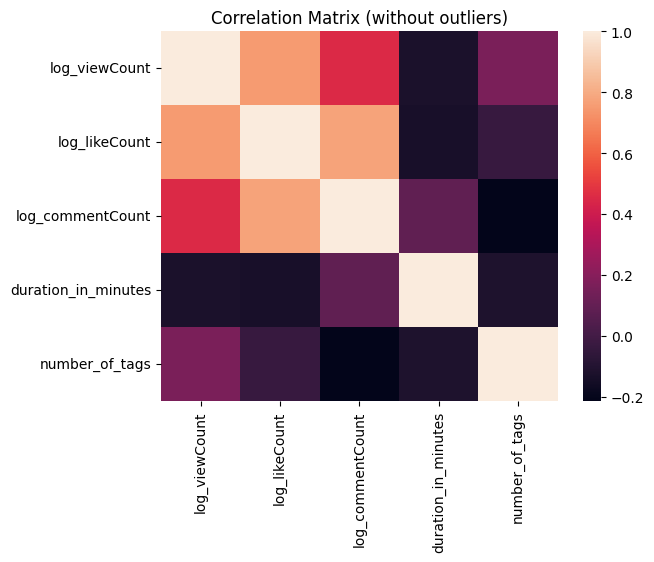

In [38]:
#heatmap
sns.heatmap(corr_res_2)
plt.title('Correlation Matrix (without outliers)')
plt.show()

In [35]:
#sns.regplot(x='duration_in_minutes', y='log_viewCount', data=df_filtered)
#plt.title('Trend of Duration vs ViewCount Without Outliers')
#plt.show()

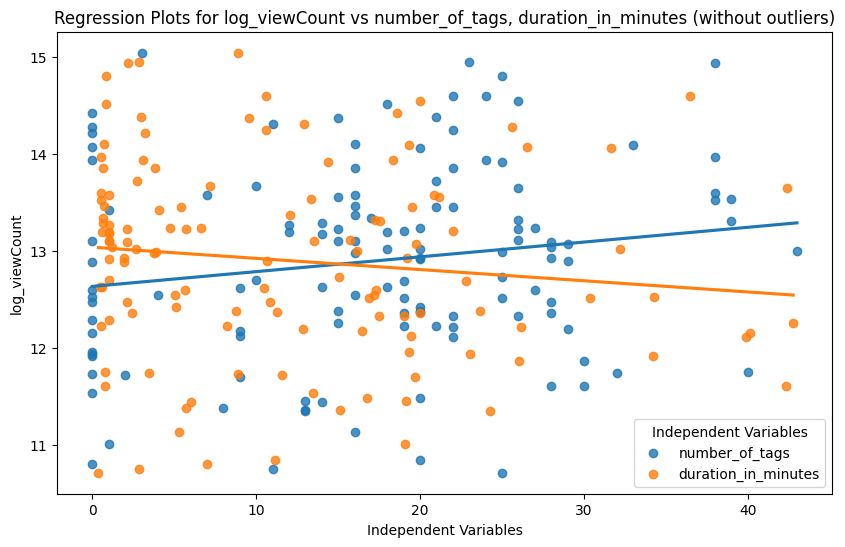

In [26]:
# Define the independent variables (x-axis) and dependent variable (y-axis)
x_cols = ['number_of_tags', 'duration_in_minutes']
y_col = 'log_viewCount'

# Plotting
plt.figure(figsize=(10, 6))

for x_col in x_cols:
    sns.regplot(x=x_col, y=y_col, data=df_filtered, label=x_col, ci=None)

plt.legend(title="Independent Variables")
plt.xlabel("Independent Variables")
plt.ylabel(y_col)
plt.title(f'Regression Plots for {y_col} vs {", ".join(x_cols)} (without outliers)')
plt.show()

### Optimal video length

C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_4888\1841184048.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['duration_interval'] = pd.cut(df_filtered['duration_in_minutes'], bins=bins, labels=labels, right=False)
C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_4888\1841184048.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_int = df_filtered.groupby('duration_interval').agg({'log_viewCount': 'mean', 'log_likeCount': 'mean', 'log_commentCount': 'mean'}).reset_index()


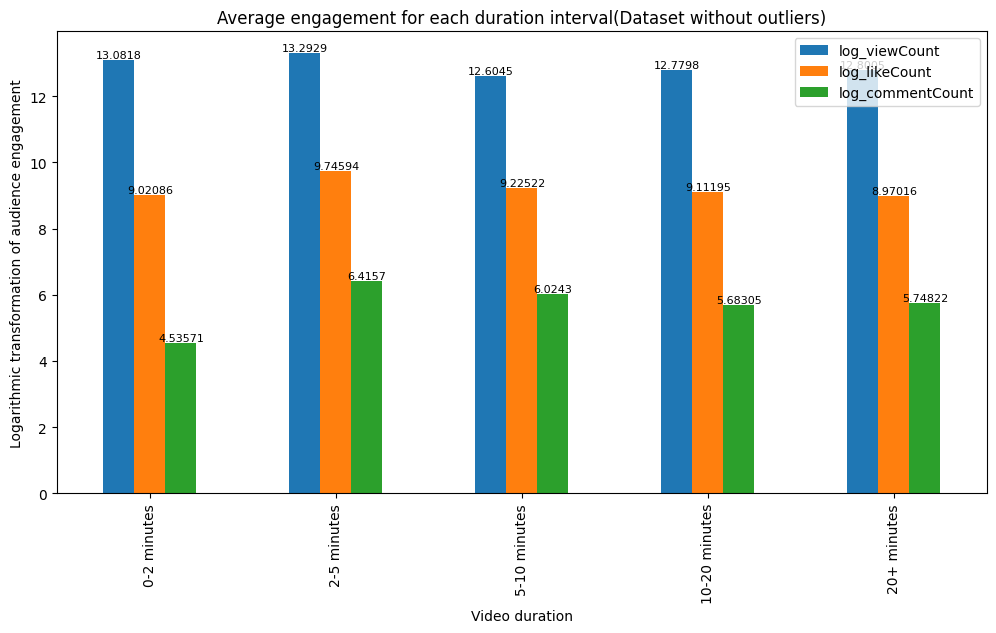

In [33]:
# visualising time interval vs engagement
bins = [0, 2, 5, 10, 20, df_filtered['duration_in_minutes'].max()]

# Defined the labels for the bins
labels = ['0-2 minutes', '2-5 minutes', '5-10 minutes', '10-20 minutes', '20+ minutes']

# Created a new column with the binned duration
df_filtered['duration_interval'] = pd.cut(df_filtered['duration_in_minutes'], bins=bins, labels=labels, right=False)
time_int = df_filtered.groupby('duration_interval').agg({'log_viewCount': 'mean', 'log_likeCount': 'mean', 'log_commentCount': 'mean'}).reset_index()
ax = time_int.plot(x='duration_interval', kind = 'bar', stacked= False, figsize = (12,6))
for container in ax.containers:
    plt.bar_label(container, label_type='edge', fontsize=8)
plt.xlabel('Video duration')
plt.ylabel('Logarithmic transformation of audience engagement')
plt.title('Average engagement for each duration interval(Dataset without outliers)')
plt.show()

### Caption Availability and Engagement 

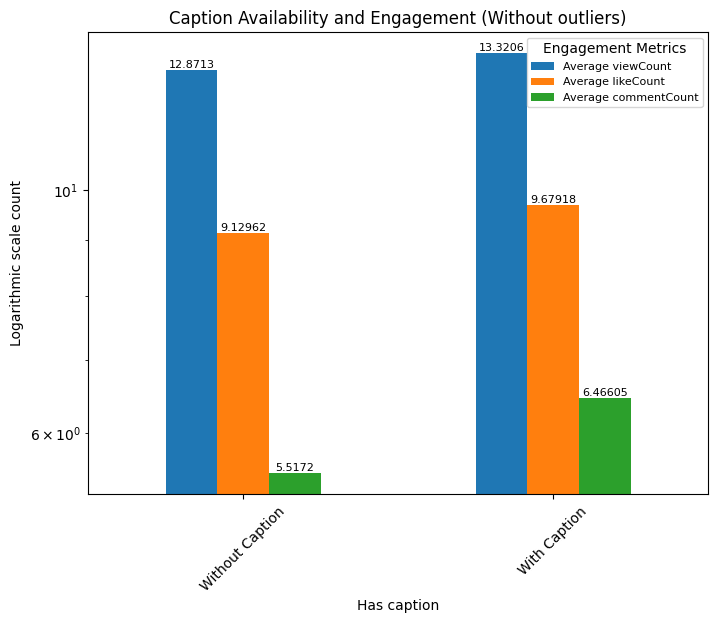

In [28]:
caption_stats = df_filtered.groupby('has_caption').agg({'log_viewCount':'mean', 'log_likeCount':'mean', 'log_commentCount':'mean'}).reset_index()
ax= caption_stats.plot(x = 'has_caption', kind = 'bar', logy= True, figsize = (8,6), legend = False)
ax.legend(['Average viewCount', 'Average likeCount', 'Average commentCount'], title= "Engagement Metrics", fontsize= 8)
ax.set_xticks([0,1])
ax.set_xticklabels(['Without Caption', 'With Caption'], rotation = 45)

for container in ax.containers:
    plt.bar_label(container, label_type='edge', fontsize=8)
plt.ylabel('Logarithmic scale count')
plt.xlabel('Has caption')
plt.title('Caption Availability and Engagement (Without outliers)')
plt.show()

### Audience Language and Regional Analysis

In [29]:
df_lang= df_filtered.dropna()

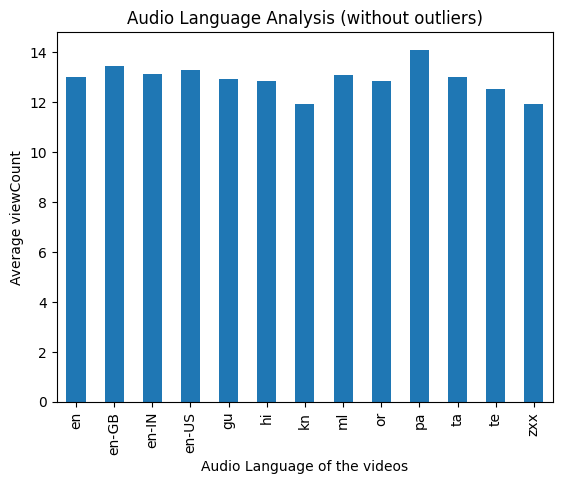

In [30]:
df_lang_analysis= df_lang.groupby('defaultAudioLanguage').agg({'log_viewCount':'mean', 'log_likeCount':'mean', 'log_commentCount':'mean'}).reset_index()
df_lang_analysis.plot(x='defaultAudioLanguage', y='log_viewCount', kind = 'bar', legend= False)
plt.xlabel('Audio Language of the videos')
plt.ylabel('Average viewCount')
plt.title('Audio Language Analysis (without outliers)')
plt.show()

### Time series analysis without outliers

In [31]:
#extract the date components
df_filtered['hour'] = df_filtered['publishedAt'].dt.hour 
df_filtered['day_of_week']= df_filtered['publishedAt'].dt.dayofweek
df_filtered['month']= df_filtered['publishedAt'].dt.month

# Group by the time components and calculate averages
hourly_avg= df_filtered.groupby('hour')['log_viewCount'].mean().reset_index()
daily_avg = df_filtered.groupby('day_of_week')['log_viewCount'].mean().reset_index()
monthly_avg = df_filtered.groupby('month')['log_viewCount'].mean().reset_index()

C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_4888\1671371138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour'] = df_filtered['publishedAt'].dt.hour
C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_4888\1671371138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week']= df_filtered['publishedAt'].dt.dayofweek
C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_4888\1671371138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

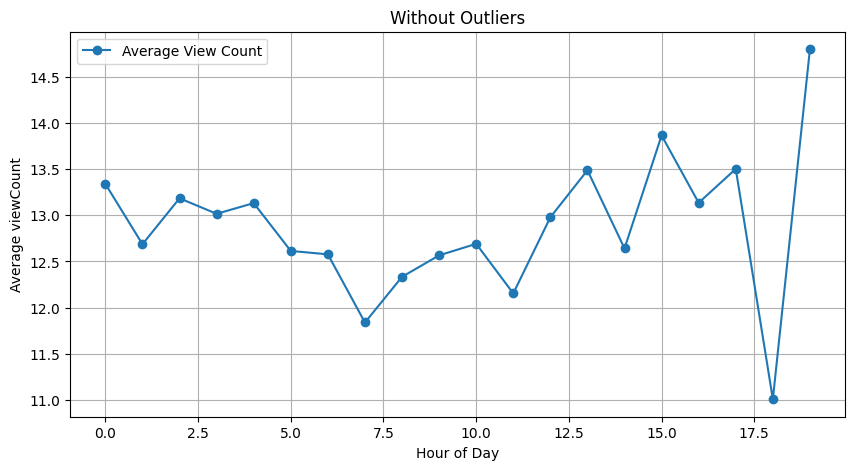

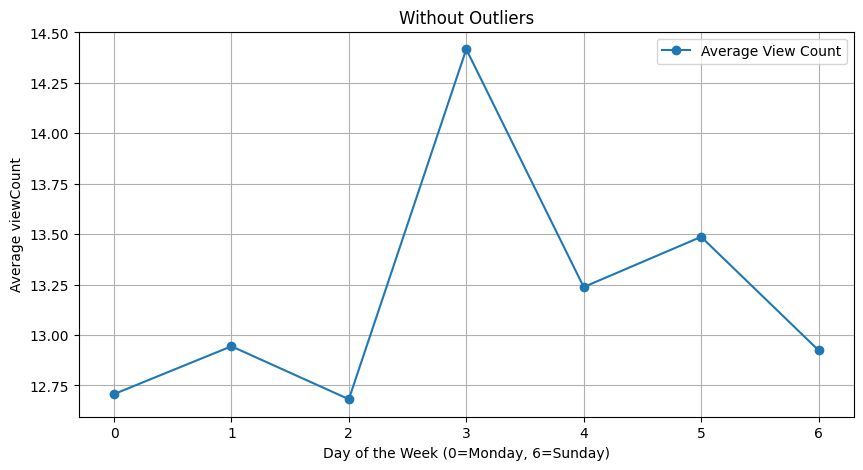

In [32]:
# Plot for hour of day
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['log_viewCount'], label='Average View Count', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average viewCount')
plt.title('Without Outliers')
plt.legend()
plt.grid(True)
plt.show()

# Plot for day of the week
plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['log_viewCount'], label='Average View Count', marker='o')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average viewCount')
plt.title('Without Outliers')
plt.legend()
plt.grid(True)
plt.show()